In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\datasets\Housing.csv")

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [146]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [147]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [148]:
df.shape

(200, 4)

In [149]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [150]:
num = df.select_dtypes(include= ['int64', 'float64'])

In [151]:
f = [features for features in num if len(df[features].unique())>1]
print(f)


['TV', 'Radio', 'Newspaper', 'Sales']


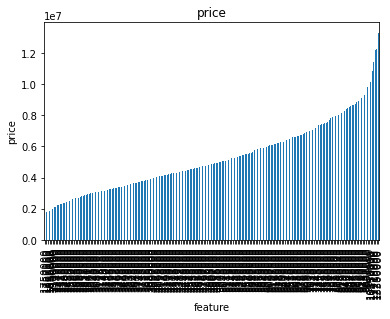

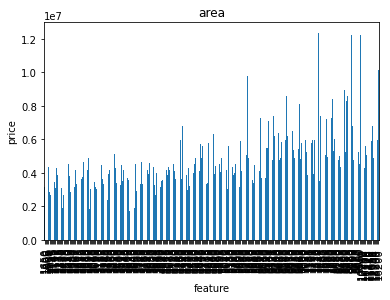

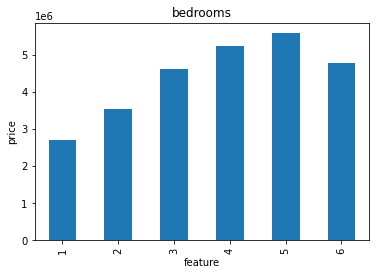

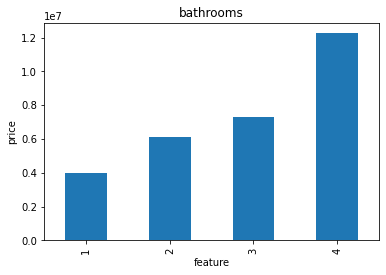

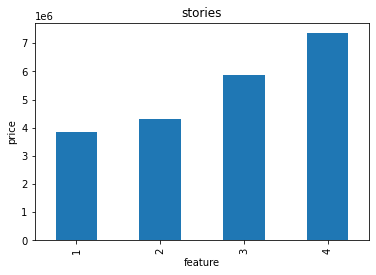

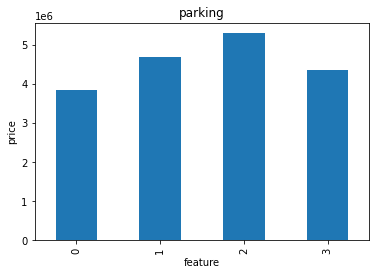

In [69]:

for feature in f:
    df1 = df.copy()
    #let's calculate the mean salesprice where the information is missing 
    df1.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('price')
    plt.xlabel('feature')
    plt.show()

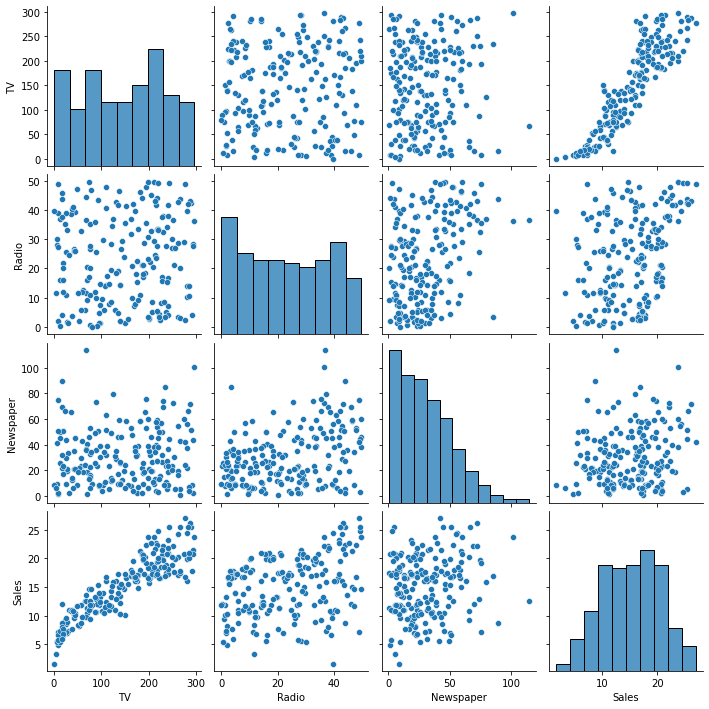

In [152]:
sns.pairplot(df)

In [153]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [154]:
cat_var = df.select_dtypes(include=['object']).keys()


In [73]:
from sklearn.preprocessing   import LabelEncoder

In [74]:
le=LabelEncoder()

In [75]:
for var in cat_var:
    df[var]=le.fit_transform(df[var])

In [76]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [97]:
from sklearn.preprocessing import StandardScaler
se= StandardScaler()
b= se.fit_transform(df)

In [98]:
from sklearn.preprocessing import PowerTransformer
pe=PowerTransformer()
c=pe.fit_transform(b)

In [99]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [155]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [156]:
from sklearn.model_selection import train_test_split

In [195]:
x = df.iloc[:, :3]
y = df.iloc[:, -1]

In [196]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [197]:
from sklearn.linear_model import LinearRegression

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state= 100) 

In [220]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [221]:
pred = lr.predict(x_test)

In [222]:
pred1 = lr.predict(x_train)

In [223]:
from sklearn.metrics import r2_score

In [224]:
r2_score(y_test, pred)

0.8655979373420273

In [225]:
from sklearn.model_selection import cross_val_score , KFold

In [226]:
k_folds = KFold(n_splits = 6)

In [227]:
scores = cross_val_score(lr,x,y, cv = k_folds)

In [228]:
print(max(scores))

0.9297025097685202


In [229]:
print(min(scores))

0.8632983079178027


In [230]:
print( scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

[0.86776441 0.9189416  0.92970251 0.88410883 0.86329831 0.90646715]
Average CV Score:  0.8950471356185465
Number of CV Scores used in Average:  6


In [234]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)  


DecisionTreeRegressor()

In [235]:
pred = dt.predict(x_test)

In [236]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8589907023428329

In [238]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [239]:
pred = kn.predict(x_test)

In [240]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9049073541268843